In [ ]:
%load_ext autoreload
%autoreload 2

import sys

import numpy as np
import numpy.linalg as npla
import os
import scipy
import scipy.linalg as sla
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
%matplotlib inline
from typing import List
import itertools

In [2]:
EG_Loopless_loggers = defaultdict(dict)
EG_Looped_loggers = defaultdict(dict)
Alg2_loggers = defaultdict(dict)
MPC_loggers = defaultdict(dict)

In [3]:
def download_batches(batch_sizes: List[int], filename:str, appendices: List[str], loggers: List[dict]):
    for b in batch_sizes:
        for appendix, logger in zip(appendices, loggers):
            with open(f"save/{filename}b{b}{appendix}", 'rb') as f:
                logger[b][filename] = pickle.load(f)
            with open(f"save/{filename}b{b}{appendix}orig", 'rb') as f:
                logger[b][filename+"orig"] = pickle.load(f)

In [4]:
appendiсes = ["Algorithm2", "EG-Loopless", "EG-Looped", "MPC"]
loggers = [Alg2_loggers, EG_Loopless_loggers, EG_Looped_loggers, MPC_loggers]
labels = ["Alg.1", "EG-Alc-Alg.1", "EG-Alc-Alg.2", "EG-Car"]
batch_size = [1, 3, 5, 10]
problem_names = ["probl_1e", "probl_2e", "probl_3e"]
titles = ["Policeman and Burglar matrix", "Test matrix 1", "Test matrix 2"]
save_dir = './plots'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
save_path = [[os.path.join(save_dir, name+f"b{b}.pdf") for b in batch_size] for name in problem_names]

In [7]:
def get_index(logger, epoch_budget, dual_gap_budget=1e-6):
    x_ind = int()
    y_ind = int()
    if logger[3][-1] < epoch_budget:
        x_ind = len(logger[3])
    else:
        x_ind = [index for index, el in enumerate(logger[3]) if el > epoch_budget][0]
    if logger[0][-1] > dual_gap_budget:
        y_ind = len(logger[0])
    else:
        y_ind = [index for index, el in enumerate(logger[0]) if el < dual_gap_budget][0]
    return min(x_ind, y_ind)

In [8]:
def plot_single_problem(b: int, matrix_name: str, filename: str, epoch_budget: int, 
                 loggers: List[dict], labels: List[str], save_to=None):
    plt.figure(figsize=(12, 6))
    marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
    
    plt.title(f'{matrix_name}, b={b}', fontsize=25)
    ax = plt.gca()
    for logger, label in zip(loggers, labels):
        data = logger[b][filename]
        data_orig = logger[b][filename+"orig"]
        epoch_ind = get_index(data, epoch_budget)
        epoch_ind_orig = get_index(data_orig, epoch_budget)
        
        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(data[3][:epoch_ind], data[0][:epoch_ind], label=label, marker=next(marker), color=color, markevery=0.15, markersize=6)
        plt.plot(data_orig[3][:epoch_ind_orig], data_orig[0][:epoch_ind_orig], color=color, markevery=0.15, markersize=10, linestyle='dashed')

    plt.xlabel('Epoch', fontsize=22)
    plt.ylabel('Duality Gap', fontsize=22)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tick_params(labelsize=15)
    plt.yscale('log')
    plt.legend(fontsize=22, loc='lower right')
    plt.grid()
    
    if save_to is not None:
        plt.savefig(save_to, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

In [9]:
def plot_batches(batch_sizes: List[int], matrix_name: str, filename: str, epoch_budget: int, 
                 loggers: List[dict], labels: List[str], save_to=List[None]):
    download_batches(batch_sizes, filename, appendiсes, loggers)
    for b, filepath in zip(batch_sizes, save_to):
        plot_single_problem(b, matrix_name, filename, epoch_budget, loggers, labels, filepath)

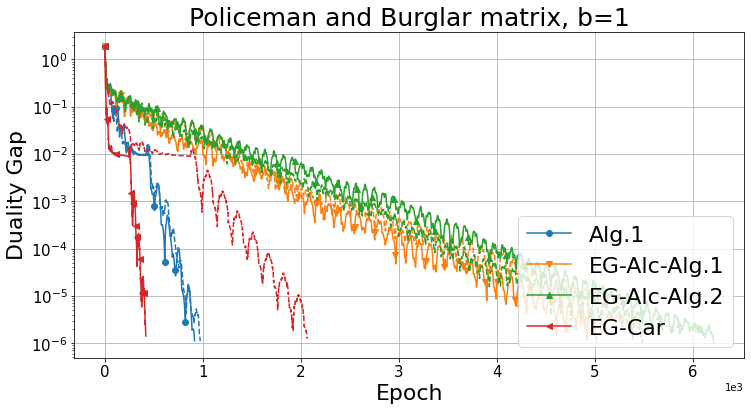

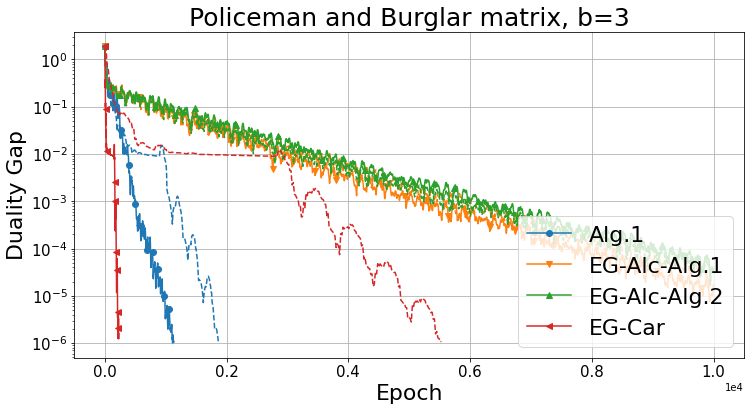

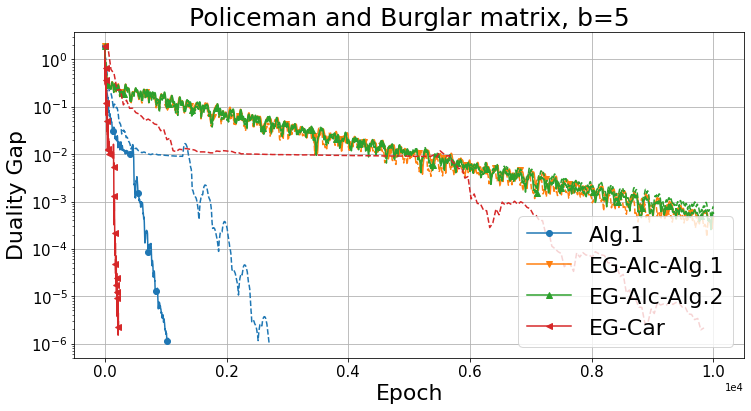

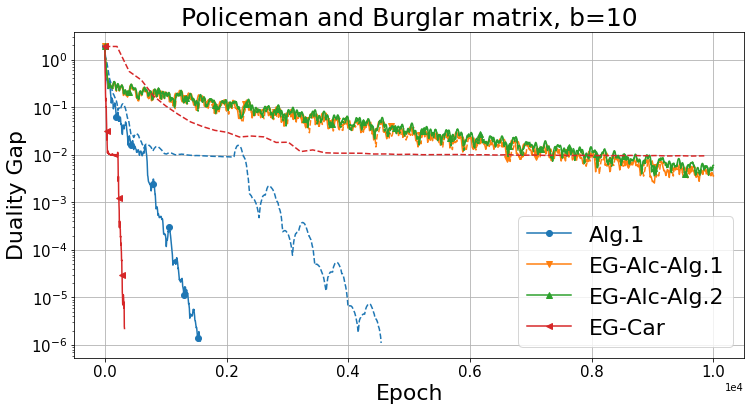

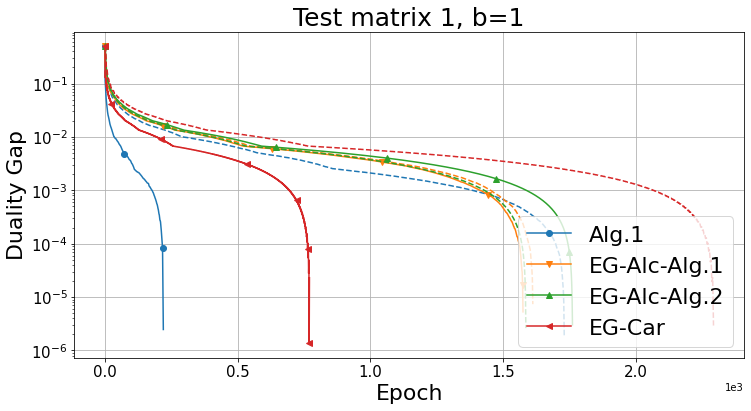

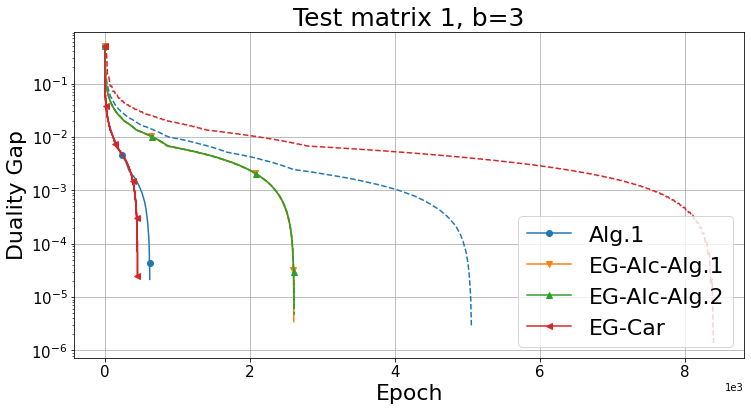

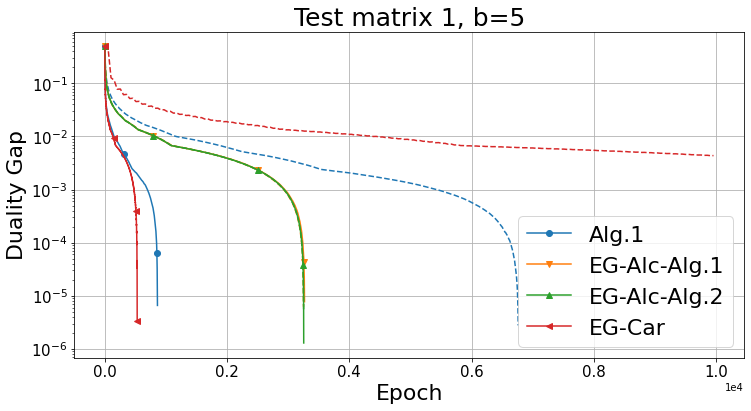

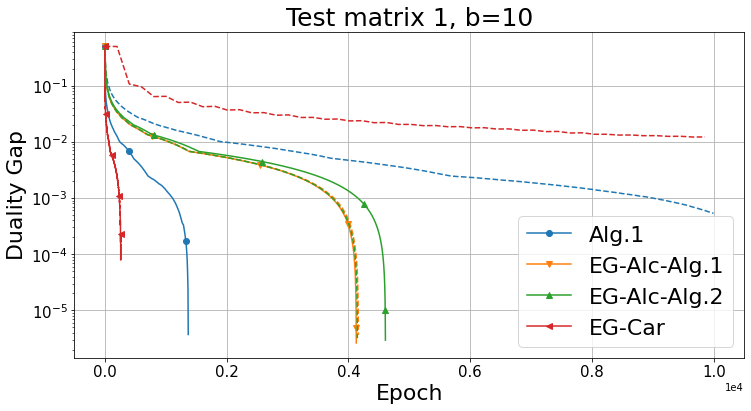

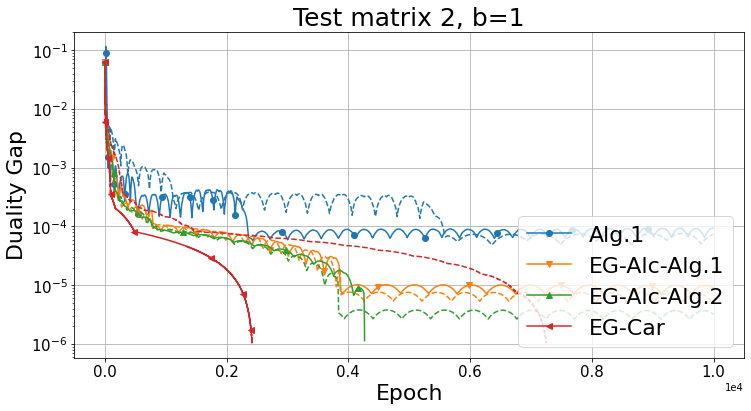

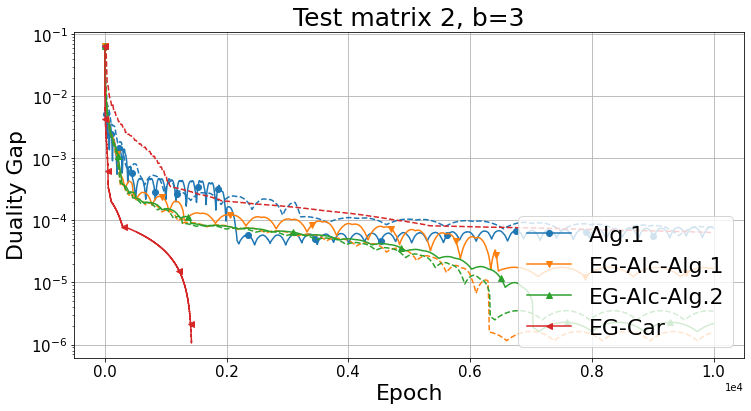

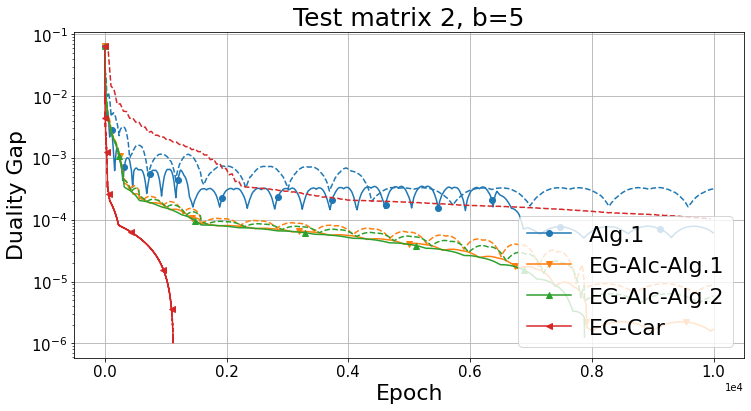

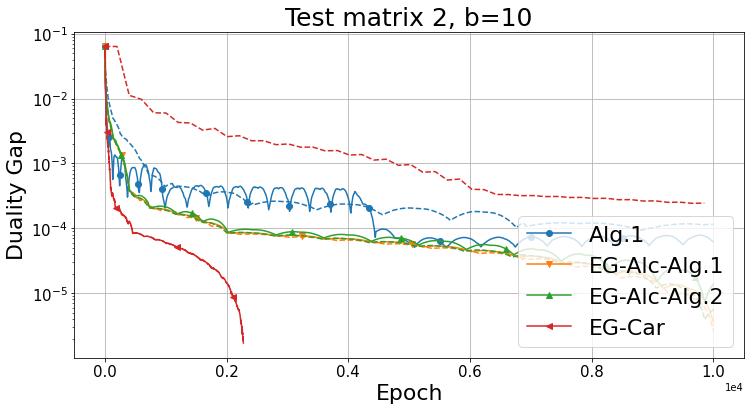

In [11]:
for i, name in enumerate(problem_names):
    plot_batches(batch_size, titles[i], name, 10000, loggers, labels, [None] * len(batch_size))

In [12]:
for i, name in enumerate(problem_names):
    plot_batches(batch_size, titles[i], name, 10000, loggers, labels, save_to=save_path[i])